In [1]:
# Initial imports
import pandas as pd
import numpy as np
from path import Path
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(7)

In [3]:
# Read in data
file_path = Path("Resources/clean_data_v.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,color_D,color_E,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,...,1,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Rename columns
df = df.rename(columns={"depth": "total depth percentage", "x": "length", "y":"width", "z": "depth"})

In [5]:
# Drop unnecessary column
df = df.drop(columns=["Unnamed: 0"])
df.columns

Index(['carat', 'total depth percentage', 'table', 'price', 'length', 'width',
       'depth', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [6]:
# Create the features set (X) and the target set (y)
X = df.drop(columns=["price"]).values
y = df["price"].values

In [7]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [8]:
# Scale the data of the features set using the StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

StandardScaler()

In [10]:
# Create a shallow, 1 hidden layer, neural network

# Define the model
number_inputs = 26
number_hidden_nodes = 16

nn_1 = Sequential()
nn_1.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

# Output layer
number_classes = 1

nn_1.add(Dense(units=number_classes, activation="linear"))

In [11]:
nn_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile model
nn_1.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_1= nn_1.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1265/1265 [==============================] - 1s 1ms/step - loss: 30902786.0000 - mean_absolute_error: 3902.8142
Epoch 2/125
1265/1265 [==============================] - 1s 1ms/step - loss: 27943832.0000 - mean_absolute_error: 3709.6052
Epoch 3/125
1265/1265 [==============================] - 1s 1ms/step - loss: 23202964.0000 - mean_absolute_error: 3372.8376
Epoch 4/125
1265/1265 [==============================] - 2s 1ms/step - loss: 18101896.0000 - mean_absolute_error: 2955.3989
Epoch 5/125
1265/1265 [==============================] - 1s 1ms/step - loss: 13483164.0000 - mean_absolute_error: 2513.6980
Epoch 6/125
1265/1265 [==============================] - 1s 1ms/step - loss: 9777185.0000 - mean_absolute_error: 2120.0295
Epoch 7/125
1265/1265 [==============================] - 1s 1ms/step - loss: 7108287.0000 - mean_absolute_error: 1814.6373
Epoch 8/125
1265/1265 [==============================] - 1s 1ms/step - loss: 5325368.0000 - mean_absolute_error: 1594.0109
Epoch 9/125

In [13]:
predicted_1 = nn_1.predict(X_test_scaled)
print(predicted_1.reshape(1,-1)[0])

[ 770.2806  3809.1973  3105.0547  ...  601.39136 5501.038    712.78174]


In [14]:
model_1_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_1.reshape(1,-1)[0] })
model_1_results_df

,y_test,y_pred
0,1110,770.280579
1,4796,3809.197266
2,3619,3105.054688
3,8545,7870.036133
4,732,609.590820
...,...,...
13480,1389,1515.856689
13481,7637,7206.698730
13482,552,601.391357
13483,5480,5501.038086


In [15]:
model_1_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,3907.685059
std,3987.398695,3899.824707
min,327.000000,60.335739
25%,942.000000,940.826660
50%,2375.000000,2325.927979
75%,5372.000000,5520.289062
max,18806.000000,26868.097656


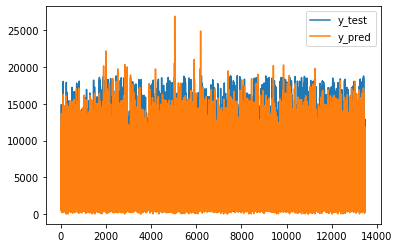

In [16]:
model_1_results_df.plot()

In [17]:
# Create a neural network with 2 hidden layers with 16 hidden nodes each
# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16

nn_2 = Sequential()

# First hidden layer
nn_2.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn_2.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_2.add(Dense(units=1, activation="linear"))

In [18]:
# Compile model
nn_2.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_2 = nn_2.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1265/1265 [==============================] - 2s 1ms/step - loss: 23383658.0000 - mean_absolute_error: 3306.2090A: 1s - loss: 30917766.0000 - mean
Epoch 2/125
1265/1265 [==============================] - 2s 1ms/step - loss: 4024089.0000 - mean_absolute_error: 1321.9788
Epoch 3/125
1265/1265 [==============================] - 2s 1ms/step - loss: 1641604.5000 - mean_absolute_error: 825.9730
Epoch 4/125
1265/1265 [==============================] - 2s 1ms/step - loss: 1205468.8750 - mean_absolute_error: 681.1028
Epoch 5/125
1265/1265 [==============================] - 2s 1ms/step - loss: 1090050.1250 - mean_absolute_error: 641.7827
Epoch 6/125
1265/1265 [==============================] - 2s 1ms/step - loss: 1037924.3750 - mean_absolute_error: 618.3869
Epoch 7/125
1265/1265 [==============================] - 2s 1ms/step - loss: 994965.0000 - mean_absolute_error: 597.0682
Epoch 8/125
1265/1265 [==============================] - 2s 1ms/step - loss: 957763.3750 - mean_absolute_error

In [19]:
predicted_2 = nn_2.predict(X_test_scaled)
print(predicted_2.reshape(1,-1)[0])

[1196.8717  3866.308   3483.6206  ...  621.04065 5555.7803   719.00793]


In [20]:
model_2_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_2.reshape(1,-1)[0] })

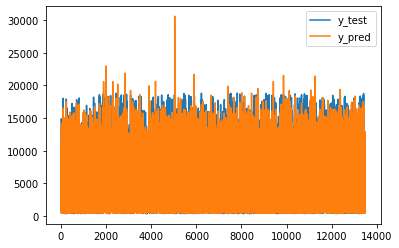

In [21]:
model_2_results_df.plot()

In [22]:
model_2_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,3913.703125
std,3987.398695,3912.408203
min,327.000000,394.134247
25%,942.000000,949.669800
50%,2375.000000,2404.327637
75%,5372.000000,5340.572754
max,18806.000000,30575.546875


In [23]:
model_2_results_df.sum()

Total_delta = (model_2_results_df.sum()[1] - model_2_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_2_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_2_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_2_results_df.sum()[1],",.0f"))

Total delta is $ -175,714
Delta as % of total price is -0.33%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 52,776,135


In [24]:
# Create a neural network with 3 hidden layers with 16 hidden nodes each
# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_3 = Sequential()

# First hidden layer
nn_3.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn_3.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_3.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_3.add(Dense(units=1, activation="linear"))

In [25]:
# Compile model
nn_3.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_3 = nn_3.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1265/1265 [==============================] - 2s 2ms/step - loss: 12363257.0000 - mean_absolute_error: 1992.1362
Epoch 2/125
1265/1265 [==============================] - 2s 1ms/step - loss: 1072752.1250 - mean_absolute_error: 600.2790
Epoch 3/125
1265/1265 [==============================] - 2s 1ms/step - loss: 939098.1250 - mean_absolute_error: 561.8337
Epoch 4/125
1265/1265 [==============================] - 2s 1ms/step - loss: 862424.0000 - mean_absolute_error: 524.4554: 0s - loss: 777892.1250 - mean_absolute
Epoch 5/125
1265/1265 [==============================] - 2s 1ms/step - loss: 799640.1250 - mean_absolute_error: 489.7092
Epoch 6/125
1265/1265 [==============================] - 2s 2ms/step - loss: 751378.6250 - mean_absolute_error: 460.6042
Epoch 7/125
1265/1265 [==============================] - 2s 1ms/step - loss: 709756.8125 - mean_absolute_error: 439.9492
Epoch 8/125
1265/1265 [==============================] - 1s 1ms/step - loss: 677051.8125 - mean_absolute_erro

In [26]:
predicted_3 = nn_3.predict(X_test_scaled)
print(predicted_3.reshape(1,-1)[0])

[1156.6036 3825.8574 3416.1824 ...  481.8821 5578.4697  773.8808]


In [27]:
model_3_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_3.reshape(1,-1)[0] })

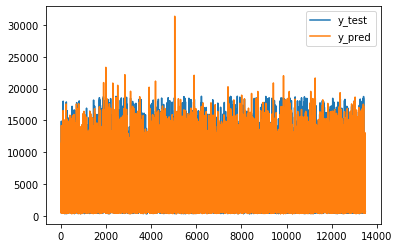

In [28]:
model_3_results_df.plot()

In [29]:
model_3_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,3925.331787
std,3987.398695,3915.568604
min,327.000000,330.782074
25%,942.000000,960.374634
50%,2375.000000,2416.104004
75%,5372.000000,5370.264648
max,18806.000000,31358.373047


In [30]:
model_3_results_df.sum()

Total_delta = (model_3_results_df.sum()[1] - model_3_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_3_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_3_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_3_results_df.sum()[1],",.0f"))

Total delta is $ -18,576
Delta as % of total price is -0.04%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 52,933,273


In [31]:
# Create a neural network with 4 hidden layers with 16 hidden nodes each

# Define the model - deep neural net
number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16
hidden_nodes_layer4 =16

nn_4 = Sequential()

# First hidden layer
nn_4.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn_4.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_4.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Fourth hidden layer
nn_4.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_4.add(Dense(units=1, activation="linear"))

In [32]:
# Compile model
nn_4.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_4 = nn_4.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1265/1265 [==============================] - 2s 1ms/step - loss: 6553943.0000 - mean_absolute_error: 1231.5406
Epoch 2/125
1265/1265 [==============================] - 2s 1ms/step - loss: 881901.3750 - mean_absolute_error: 485.8986
Epoch 3/125
1265/1265 [==============================] - 1s 1ms/step - loss: 758357.4375 - mean_absolute_error: 429.9509
Epoch 4/125
1265/1265 [==============================] - 2s 1ms/step - loss: 699169.2500 - mean_absolute_error: 410.5918
Epoch 5/125
1265/1265 [==============================] - 2s 1ms/step - loss: 650125.3750 - mean_absolute_error: 396.0559
Epoch 6/125
1265/1265 [==============================] - 2s 1ms/step - loss: 616222.0000 - mean_absolute_error: 385.2208
Epoch 7/125
1265/1265 [==============================] - 1s 1ms/step - loss: 583546.3750 - mean_absolute_error: 378.4833
Epoch 8/125
1265/1265 [==============================] - 1s 1ms/step - loss: 562830.5625 - mean_absolute_error: 373.5347
Epoch 9/125
1265/1265 [=======

In [33]:
predicted_4 = nn_4.predict(X_test_scaled)
print(predicted_4.reshape(1,-1)[0])

[1077.5917  3894.8765  3555.4736  ...  528.50793 5657.7666   671.25104]


In [34]:
model_4_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_4.reshape(1,-1)[0] })

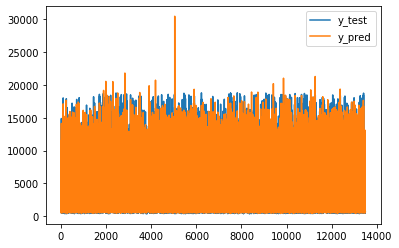

In [35]:
model_4_results_df.plot()

In [36]:
model_4_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,3945.958252
std,3987.398695,3915.737061
min,327.000000,464.247589
25%,942.000000,959.107117
50%,2375.000000,2446.680664
75%,5372.000000,5401.319824
max,18806.000000,30489.978516


In [37]:
model_4_results_df.sum()

Total_delta = (model_4_results_df.sum()[1] - model_4_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_4_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_4_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_4_results_df.sum()[1],",.0f"))

Total delta is $ 259,346
Delta as % of total price is 0.49%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 53,211,195


In [38]:
# Create neural net with 3 hidden layers with sigmoid activation for each hidden layer

# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_5 = Sequential()

# First hidden layer
nn_5.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)
# Second hidden layer
nn_5.add(Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn_5.add(Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn_5.add(Dense(units=1, activation="linear"))

In [39]:
# Compile the model
nn_5.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_5 = nn_5.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/20
1265/1265 [==============================] - 1s 1ms/step - loss: 31336718.0000 - mean_absolute_error: 3926.2759
Epoch 2/20
1265/1265 [==============================] - 1s 1ms/step - loss: 31175096.0000 - mean_absolute_error: 3905.6089
Epoch 3/20
1265/1265 [==============================] - 1s 1ms/step - loss: 31004116.0000 - mean_absolute_error: 3883.7043
Epoch 4/20
1265/1265 [==============================] - 1s 1ms/step - loss: 30847390.0000 - mean_absolute_error: 3863.4192
Epoch 5/20
1265/1265 [==============================] - 2s 1ms/step - loss: 30693706.0000 - mean_absolute_error: 3843.4678
Epoch 6/20
1265/1265 [==============================] - 2s 1ms/step - loss: 30541170.0000 - mean_absolute_error: 3823.6809
Epoch 7/20
1265/1265 [==============================] - 3s 2ms/step - loss: 30389586.0000 - mean_absolute_error: 3803.7559
Epoch 8/20
1265/1265 [==============================] - 2s 2ms/step - loss: 30239016.0000 - mean_absolute_error: 3783.9456
Epoch 9/20
1265/

In [40]:
predicted_5 = nn_5.predict(X_test_scaled)
print(predicted_5.reshape(1,-1)[0])

[414.73425 414.73425 414.73425 ... 414.73425 414.73425 414.73425]


In [41]:
model_5_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_5.reshape(1,-1)[0] })

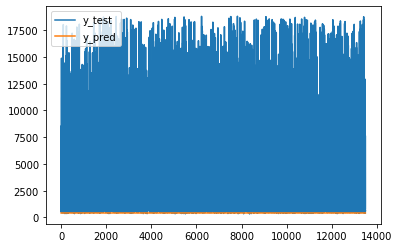

In [42]:
model_5_results_df.plot()

In [43]:
model_5_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,414.685272
std,3987.398695,0.048985
min,327.000000,414.734253
25%,942.000000,414.734253
50%,2375.000000,414.734253
75%,5372.000000,414.734253
max,18806.000000,414.734253


In [44]:
model_5_results_df.sum()

Total_delta = (model_5_results_df.sum()[1] - model_5_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_5_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_5_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_5_results_df.sum()[1],",.0f"))

Total delta is $ -47,359,158
Delta as % of total price is -89.44%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 5,592,691


In [45]:
# Neural network with 3 hidden layer that use tanh activation function at each hidden layer

# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_6 = Sequential()

# First hidden layer
nn_6.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)
# Second hidden layer
nn_6.add(Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_6.add(Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn_6.add(Dense(units=1, activation="linear"))

In [46]:
# Compile the model
nn_6.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_6 = nn_6.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/20
1265/1265 [==============================] - 2s 2ms/step - loss: 31272892.0000 - mean_absolute_error: 3918.5559
Epoch 2/20
1265/1265 [==============================] - 2s 2ms/step - loss: 31094824.0000 - mean_absolute_error: 3895.3210
Epoch 3/20
1265/1265 [==============================] - 2s 1ms/step - loss: 30929402.0000 - mean_absolute_error: 3874.0842
Epoch 4/20
1265/1265 [==============================] - 2s 1ms/step - loss: 30766132.0000 - mean_absolute_error: 3852.8906
Epoch 5/20
1265/1265 [==============================] - 2s 1ms/step - loss: 30604070.0000 - mean_absolute_error: 3831.7808
Epoch 6/20
1265/1265 [==============================] - 2s 1ms/step - loss: 30442726.0000 - mean_absolute_error: 3810.7993
Epoch 7/20
1265/1265 [==============================] - 2s 1ms/step - loss: 30282420.0000 - mean_absolute_error: 3789.6411
Epoch 8/20
1265/1265 [==============================] - 2s 1ms/step - loss: 30123094.0000 - mean_absolute_error: 3768.6069A: 1s - loss: 290

In [47]:
predicted_6 = nn_6.predict(X_test_scaled)
print(predicted_6.reshape(1,-1)[0])

[429.06586 429.06586 429.06586 ... 429.06586 429.06586 429.06586]


In [48]:
model_6_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_6.reshape(1,-1)[0] })

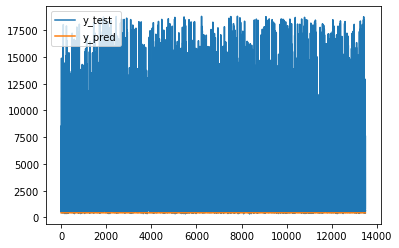

In [49]:
model_6_results_df.plot()

In [50]:
model_6_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,429.034027
std,3987.398695,0.031829
min,327.000000,429.065704
25%,942.000000,429.065857
50%,2375.000000,429.065857
75%,5372.000000,429.065857
max,18806.000000,429.065857


In [51]:
model_6_results_df.sum()

Total_delta = (model_6_results_df.sum()[1] - model_6_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_6_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_6_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_6_results_df.sum()[1],",.0f"))

Total delta is $ -47,165,896
Delta as % of total price is -89.07%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 5,785,953


In [52]:
# Create neural network with 3 hidden layer with softmax activation function for each hidden layer 
# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_7 = Sequential()

# First hidden layer
nn_7.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softmax")
)
# Second hidden layer
nn_7.add(Dense(units=hidden_nodes_layer2, activation="softmax"))

# Third hidden layer
nn_7.add(Dense(units=hidden_nodes_layer2, activation="softmax"))

# Output layer
nn_7.add(Dense(units=1, activation="linear"))

In [53]:
# Compile the model
nn_7.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_7 = nn_7.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/20
1265/1265 [==============================] - 2s 1ms/step - loss: 31390172.0000 - mean_absolute_error: 3933.0854
Epoch 2/20
1265/1265 [==============================] - 2s 1ms/step - loss: 31363616.0000 - mean_absolute_error: 3929.7009
Epoch 3/20
1265/1265 [==============================] - 2s 1ms/step - loss: 31341242.0000 - mean_absolute_error: 3926.8564
Epoch 4/20
1265/1265 [==============================] - 2s 1ms/step - loss: 31321082.0000 - mean_absolute_error: 3924.2810
Epoch 5/20
1265/1265 [==============================] - 2s 1ms/step - loss: 31301364.0000 - mean_absolute_error: 3921.7666
Epoch 6/20
1265/1265 [==============================] - 2s 1ms/step - loss: 31281746.0000 - mean_absolute_error: 3919.2805
Epoch 7/20
1265/1265 [==============================] - 2s 1ms/step - loss: 31262212.0000 - mean_absolute_error: 3916.7810
Epoch 8/20
1265/1265 [==============================] - 2s 1ms/step - loss: 31242702.0000 - mean_absolute_error: 3914.2881
Epoch 9/20
1265/

In [54]:
predicted_7 = nn_7.predict(X_test_scaled)
print(predicted_7.reshape(1,-1)[0])

[51.64885 51.64885 51.64885 ... 51.64885 51.64885 51.64885]


In [55]:
model_7_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_7.reshape(1,-1)[0] })

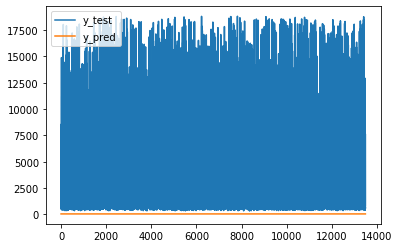

In [56]:
model_7_results_df.plot()

In [57]:
model_7_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,51.647057
std,3987.398695,0.001793
min,327.000000,51.648849
25%,942.000000,51.648849
50%,2375.000000,51.648849
75%,5372.000000,51.648849
max,18806.000000,51.648849


In [58]:
model_7_results_df.sum()

Total_delta = (model_7_results_df.sum()[1] - model_7_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_7_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_7_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_7_results_df.sum()[1],",.0f"))

Total delta is $ -52,255,364
Delta as % of total price is -98.68%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 696,485


In [59]:
# Create neural network with 3 hidden layers that each contain the swish activation function

# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_8 = Sequential()

# First hidden layer
nn_8.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="swish")
)
# Second hidden layer
nn_8.add(Dense(units=hidden_nodes_layer2, activation="swish"))

# Third hidden layer
nn_8.add(Dense(units=hidden_nodes_layer2, activation="swish"))

# Output layer
nn_8.add(Dense(units=1, activation="linear"))

In [60]:
# Compile the model
nn_8.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_8 = nn_8.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1265/1265 [==============================] - 2s 1ms/step - loss: 12972468.0000 - mean_absolute_error: 2162.9146
Epoch 2/125
1265/1265 [==============================] - 2s 1ms/step - loss: 1134339.3750 - mean_absolute_error: 657.5439
Epoch 3/125
1265/1265 [==============================] - 2s 1ms/step - loss: 964941.7500 - mean_absolute_error: 581.6642
Epoch 4/125
1265/1265 [==============================] - 2s 1ms/step - loss: 874968.0000 - mean_absolute_error: 539.9067
Epoch 5/125
1265/1265 [==============================] - 2s 1ms/step - loss: 801622.0625 - mean_absolute_error: 504.4639
Epoch 6/125
1265/1265 [==============================] - 2s 1ms/step - loss: 744049.3125 - mean_absolute_error: 474.8564
Epoch 7/125
1265/1265 [==============================] - 2s 1ms/step - loss: 691232.5625 - mean_absolute_error: 453.4092
Epoch 8/125
1265/1265 [==============================] - 2s 1ms/step - loss: 650271.6875 - mean_absolute_error: 433.9297
Epoch 9/125
1265/1265 [=====

In [61]:
predicted_8 = nn_8.predict(X_test_scaled)
print(predicted_8.reshape(1,-1)[0])

[1191.9937  4044.3877  3477.006   ...  568.49304 5604.929    724.1407 ]


In [62]:
model_8_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_8.reshape(1,-1)[0] })

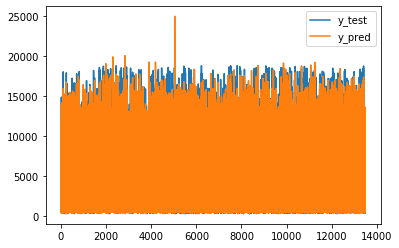

In [63]:
model_8_results_df.plot()

In [64]:
model_8_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,3917.833984
std,3987.398695,3921.712646
min,327.000000,319.749908
25%,942.000000,944.326660
50%,2375.000000,2384.658447
75%,5372.000000,5328.432129
max,18806.000000,24955.087891


In [65]:
model_8_results_df.sum()

Total_delta = (model_8_results_df.sum()[1] - model_8_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_8_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_8_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_8_results_df.sum()[1],",.0f"))

Total delta is $ -119,773
Delta as % of total price is -0.23%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 52,832,076


In [66]:
# Create a neural network with 3 hidden layers with an elu activation function in each layer

# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_9 = Sequential()

# First hidden layer
nn_9.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu")
)
# Second hidden layer
nn_9.add(Dense(units=hidden_nodes_layer2, activation="elu"))

# Third hidden layer
nn_9.add(Dense(units=hidden_nodes_layer2, activation="elu"))

# Output layer
nn_9.add(Dense(units=1, activation="linear"))

In [67]:
# Compile the model
nn_9.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_9 = nn_9.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1265/1265 [==============================] - 1s 1ms/step - loss: 11337052.0000 - mean_absolute_error: 2046.2327
Epoch 2/125
1265/1265 [==============================] - 1s 1ms/step - loss: 1387133.2500 - mean_absolute_error: 837.5886
Epoch 3/125
1265/1265 [==============================] - 1s 1ms/step - loss: 1153749.7500 - mean_absolute_error: 733.2061
Epoch 4/125
1265/1265 [==============================] - 2s 1ms/step - loss: 1035445.1250 - mean_absolute_error: 672.4750
Epoch 5/125
1265/1265 [==============================] - 1s 1ms/step - loss: 928789.5625 - mean_absolute_error: 625.8153
Epoch 6/125
1265/1265 [==============================] - 1s 1ms/step - loss: 847290.1875 - mean_absolute_error: 589.3365
Epoch 7/125
1265/1265 [==============================] - 2s 1ms/step - loss: 763619.0000 - mean_absolute_error: 559.4722
Epoch 8/125
1265/1265 [==============================] - 1s 1ms/step - loss: 694442.1875 - mean_absolute_error: 525.1273
Epoch 9/125
1265/1265 [===

In [68]:
predicted_9 = nn_9.predict(X_test_scaled)
print(predicted_9.reshape(1,-1)[0])

[1150.155   4002.5186  3439.6902  ...  539.844   5708.798    765.79614]


In [69]:
model_9_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_9.reshape(1,-1)[0] })

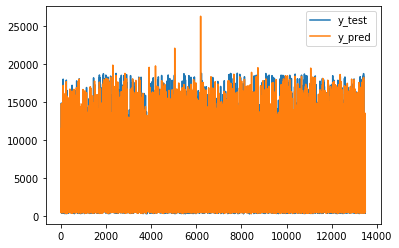

In [70]:
model_9_results_df.plot()

In [71]:
model_9_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,3937.359375
std,3987.398695,4011.732422
min,327.000000,372.250671
25%,942.000000,921.864258
50%,2375.000000,2401.975098
75%,5372.000000,5359.179688
max,18806.000000,26288.845703


In [72]:
model_9_results_df.sum()

Total_delta = (model_9_results_df.sum()[1] - model_9_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_9_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_9_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_9_results_df.sum()[1],",.0f"))

Total delta is $ 143,415
Delta as % of total price is 0.27%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 53,095,264


In [73]:
# Define the model - deep neural net
number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_10 = Sequential()

# First hidden layer
nn_10.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="selu")
)
# Second hidden layer
nn_10.add(Dense(units=hidden_nodes_layer2, activation="selu"))

# Third hidden layer
nn_10.add(Dense(units=hidden_nodes_layer2, activation="selu"))

# Output layer
nn_10.add(Dense(units=1, activation="linear"))

In [74]:
# Compile the model
nn_10.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])
# Fit the model
model_10 = nn_10.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1265/1265 [==============================] - 1s 1ms/step - loss: 13657936.0000 - mean_absolute_error: 2293.6836
Epoch 2/125
1265/1265 [==============================] - 1s 1ms/step - loss: 1370801.7500 - mean_absolute_error: 764.5668
Epoch 3/125
1265/1265 [==============================] - 2s 1ms/step - loss: 1128464.5000 - mean_absolute_error: 645.5443
Epoch 4/125
1265/1265 [==============================] - 1s 1ms/step - loss: 1017872.1250 - mean_absolute_error: 603.5992
Epoch 5/125
1265/1265 [==============================] - 2s 1ms/step - loss: 945990.6875 - mean_absolute_error: 581.2809
Epoch 6/125
1265/1265 [==============================] - 2s 1ms/step - loss: 891312.5000 - mean_absolute_error: 560.9396
Epoch 7/125
1265/1265 [==============================] - 2s 1ms/step - loss: 838363.5000 - mean_absolute_error: 542.4453
Epoch 8/125
1265/1265 [==============================] - 1s 1ms/step - loss: 783752.0625 - mean_absolute_error: 520.8514
Epoch 9/125
1265/1265 [===

In [75]:
predicted_10 = nn_10.predict(X_test_scaled)
print(predicted_10.reshape(1,-1)[0])

[1010.681   3825.6975  3452.0674  ...  636.33594 5637.0566   746.1445 ]


In [76]:
model_10_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_10.reshape(1,-1)[0] })

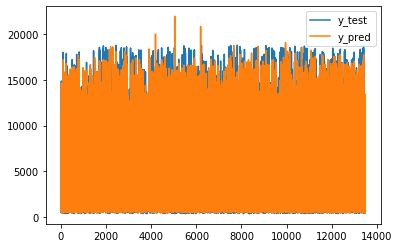

In [77]:
model_10_results_df.plot()

In [78]:
model_10_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,3939.459473
std,3987.398695,3957.333984
min,327.000000,388.136688
25%,942.000000,950.034790
50%,2375.000000,2395.582031
75%,5372.000000,5366.499023
max,18806.000000,21976.837891


In [79]:
model_10_results_df.sum()

Total_delta = (model_10_results_df.sum()[1] - model_10_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_10_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_10_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_10_results_df.sum()[1],",.0f"))

Total delta is $ 171,637
Delta as % of total price is 0.32%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 53,123,486


In [80]:
# Create a neural network with 3 hidden layers that use the softplus activation function for each hidden layer
# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_11 = Sequential()

# First hidden layer
nn_11.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softplus")
)
# Second hidden layer
nn_11.add(Dense(units=hidden_nodes_layer2, activation="softplus"))

# Third hidden layer
nn_11.add(Dense(units=hidden_nodes_layer2, activation="softplus"))

# Output layer
nn_11.add(Dense(units=1, activation="linear"))

In [81]:
# Compile the model
nn_11.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_11 = nn_11.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1265/1265 [==============================] - 2s 1ms/step - loss: 10680476.0000 - mean_absolute_error: 1762.6665
Epoch 2/125
1265/1265 [==============================] - 1s 1ms/step - loss: 993257.5625 - mean_absolute_error: 543.2322
Epoch 3/125
1265/1265 [==============================] - 2s 1ms/step - loss: 897161.0000 - mean_absolute_error: 519.6506
Epoch 4/125
1265/1265 [==============================] - 1s 1ms/step - loss: 845822.4375 - mean_absolute_error: 497.9974
Epoch 5/125
1265/1265 [==============================] - 1s 1ms/step - loss: 797747.2500 - mean_absolute_error: 474.6618
Epoch 6/125
1265/1265 [==============================] - 2s 1ms/step - loss: 757413.5000 - mean_absolute_error: 451.4607
Epoch 7/125
1265/1265 [==============================] - 3s 2ms/step - loss: 719153.8125 - mean_absolute_error: 434.6820
Epoch 8/125
1265/1265 [==============================] - 4s 3ms/step - loss: 687228.9375 - mean_absolute_error: 418.8992
Epoch 9/125
1265/1265 [======

In [82]:
predicted_11 = nn_11.predict(X_test_scaled)
print(predicted_11.reshape(1,-1)[0])

[1237.0544 3900.881  3342.885  ...  513.4042 5630.276   722.4441]


In [83]:
model_11_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_11.reshape(1,-1)[0] })

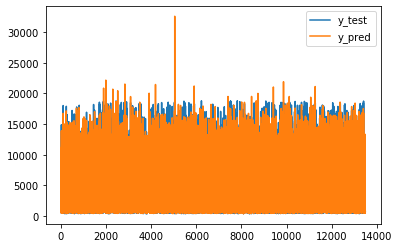

In [84]:
model_11_results_df.plot()

In [85]:
model_11_results_df.describe()

,y_test,y_pred
count,13485.000000,13485.000000
mean,3926.722210,3917.684814
std,3987.398695,3909.730225
min,327.000000,341.141205
25%,942.000000,947.761536
50%,2375.000000,2427.918213
75%,5372.000000,5365.655762
max,18806.000000,32613.578125


In [86]:
model_11_results_df.sum()

Total_delta = (model_11_results_df.sum()[1] - model_11_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_11_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_11_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_11_results_df.sum()[1],",.0f"))

Total delta is $ -121,931
Delta as % of total price is -0.23%
Total price of all diamonds in the test sample is 52,951,849
Total predicted price of all diamonds is 52,829,918


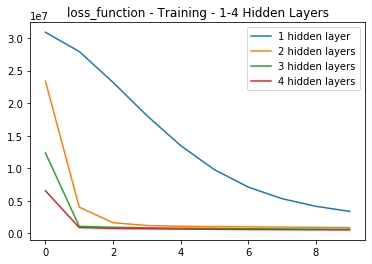

<Figure size 72000x7200 with 0 Axes>

In [118]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"][:10])
plt.plot(model_2.history["loss"][:10])
plt.plot(model_3.history["loss"][:10])
plt.plot(model_4.history["loss"][:10])
plt.title("loss_function - Training - 1-4 Hidden Layers")
plt.legend(["1 hidden layer", "2 hidden layers", "3 hidden layers", "4 hidden layers"])
plt.figure(figsize=(1000,100))
plt.show()

In [125]:
model_3_evaluation = nn_3.evaluate(X_test, y_test, verbose=0)


In [126]:
model_4_evaluation = nn_4.evaluate(X_test, y_test, verbose=0)


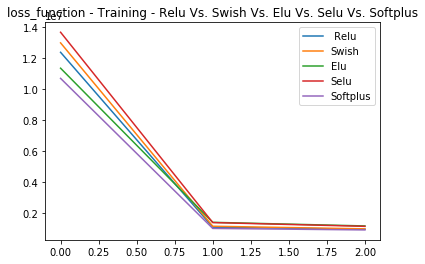

<Figure size 72000x7200 with 0 Axes>

In [122]:
plt.plot(model_3.history["loss"][:3])
plt.plot(model_8.history["loss"][:3])
plt.plot(model_9.history["loss"][:3])
plt.plot(model_10.history["loss"][:3])
plt.plot(model_11.history["loss"][:3])
plt.title("loss_function - Training - Relu Vs. Swish Vs. Elu Vs. Selu Vs. Softplus")
plt.legend([" Relu", "Swish", "Elu", "Selu", "Softplus"])
plt.figure(figsize=(1000,100))
plt.show()

In [127]:
model_8_evaluation = nn_8.evaluate(X_test, y_test, verbose=0)


In [128]:
model_9_evaluation = nn_9.evaluate(X_test, y_test, verbose=0)


In [129]:
model_10_evaluation = nn_10.evaluate(X_test, y_test, verbose=0)


In [132]:
model_11_evaluation = nn_11.evaluate(X_test, y_test, verbose=0)


In [133]:
model_summaries = {'3 Hidden Layers Relu': [f"{model_3_evaluation}"],
        '4 hidden layers Relu': [f"{model_4_evaluation}"],
        "Swish" : [f"{model_8_evaluation}"],
        "Elu" : [f"{model_9_evaluation}"],
        "Selu" : [f"{model_10_evaluation}"],
        "Softplus" : [f"{model_11_evaluation}"]
        }

model_summaries_df = pd.DataFrame (model_summaries, columns = ['3 Hidden Layers Relu','4 hidden layers Relu', "Swish", "Elu", "Selu", "Softplus"])
print(model_summaries_df)

             3 Hidden Layers Relu        4 hidden layers Relu  \
0  [607673600.0, 24574.267578125]  [847014528.0, 29026.65625]   

                             Swish                            Elu  \
0  [115648360.0, 10473.9833984375]  [115681912.0, 9119.173828125]   

                              Selu                       Softplus  
0  [173422320.0, 12539.2197265625]  [533117920.0, 23026.91796875]  
